In [42]:
import numpy as np
import pandas as pd
import os 

dir_list = ['/data/hpa/colon/cancer_distance_matrices']


df = pd.DataFrame(columns=['image_a', 'image_b', 'c_dist'])

for file_dir in dir_list:
    for cache in os.listdir(file_dir):
        data = np.load(os.path.join(file_dir, cache))
        df = df.append(pd.DataFrame(data, columns=['image_a', 'image_b', 'c_dist']))

In [43]:
metadata_df = pd.read_csv('../data/colon_enhanced.csv')
df = df.merge(metadata_df[['s3_aws_urls', 'subcellular_location']].rename(columns={'s3_aws_urls':'image_a', 'subcellular_location':'image_a_annotation'}), on='image_a')
df = df.merge(metadata_df[['s3_aws_urls', 'subcellular_location']].rename(columns={'s3_aws_urls':'image_b', 'subcellular_location':'image_b_annotation'}), on='image_b')


In [44]:
df = df[df['image_a']!=df['image_b']]
df['image_a_type'] = df.apply(lambda row: row['image_a'].split('/')[6], axis=1)
df['image_b_type'] = df.apply(lambda row: row['image_b'].split('/')[6], axis=1)
df['gene'] = df.apply(lambda row: row['image_a'].split('/')[4], axis=1)
# df['type_change'] = df.apply(lambda row: 1 if row['image_a_type']!=row['image_b_type'] else 0, axis=1)

In [31]:
subset_df = df[df['image_a_annotation']=='none']
len(subset_df)

7632

In [45]:
df.groupby(['image_a_annotation', 'image_b_annotation']).count()

image_a  \
image_a_annotation             image_b_annotation                        
cytoplasmic/membranous         cytoplasmic/membranous           137212   
                               cytoplasmic/membranous,nuclear     5380   
                               none                              23537   
                               nuclear                            1243   
cytoplasmic/membranous,nuclear cytoplasmic/membranous             5380   
                               cytoplasmic/membranous,nuclear    13792   
                               none                               1566   
                               nuclear                            3824   
none                           cytoplasmic/membranous            23537   
                               cytoplasmic/membranous,nuclear     1566   
                               none                             154538   
                               nuclear                            4160   
nuclear                        cytoplasmic/membranous             1243   
                               cytoplasmic/membranous,nuclear     3824   
                               none                               4160   
                               nuclear                           33958   

                                                               image_b  \
image_a_annotation             image_b_annotation                        
cytoplasmic/membranous         cytoplasmic/membranous           137212   
                               cytoplasmic/membranous,nuclear     5380   
                               none                              23537   
                               nuclear                            1243   
cytoplasmic/membranous,nuclear cytoplasmic/membranous             5380   
                               cytoplasmic/membranous,nuclear    13792   
                               none                               1566   
                               nuclear                            3824   
none                           cytoplasmic/membranous            23537   
                               cytoplasmic/membranous,nuclear     1566   
                               none                             154538   
                               nuclear                            4160   
nuclear                        cytoplasmic/membranous             1243   
                               cytoplasmic/membranous,nuclear     3824   
                               none                               4160   
                               nuclear                           33958   

                                                               c_dist  \
image_a_annotation             image_b_annotation                       
cytoplasmic/membranous         cytoplasmic/membranous          137212   
                               cytoplasmic/membranous,nuclear    5380   
                               none                             23537   
                               nuclear                           1243   
cytoplasmic/membranous,nuclear cytoplasmic/membranous            5380   
                               cytoplasmic/membranous,nuclear   13792   
                               none                              1566   
                               nuclear                           3824   
none                           cytoplasmic/membranous           23537   
                               cytoplasmic/membranous,nuclear    1566   
                               none                            154538   
                               nuclear                           4160   
nuclear                        cytoplasmic/membranous            1243   
                               cytoplasmic/membranous,nuclear    3824   
                               none                              4160   
                               nuclear                          33958   

                                                               image_a_type  \
ima

In [46]:
df['c_dist'].astype('float').mean()

0.10896914037217413

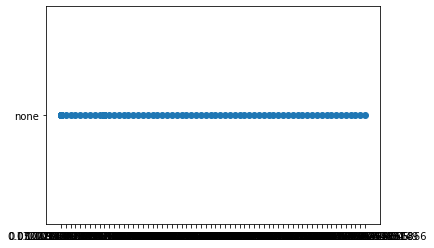

In [9]:
import matplotlib.pyplot as plt

plt.scatter(subset_df['c_dist'], subset_df['image_b_annotation'])